# < Walmart Recruiting: Trip Type Classification >

## Data fields

- 타겟 데이터
    - `TripType` : 고객의 수행한 쇼핑 유형을 나타내는 카테고리 ID. TripType_999는 '기타' 카테고리 
- 특징 데이터
    - `VisitNumber` : 단일 고객에 의한 단일 매장방문에 해당하는 ID.
    - `Weekday` : 매장을 방문한 요일.
    - `Upc` : 구입한 제품의 바코드 번호.  --> 각 제품을 가리킴.
    - `ScanCount` : 구입한 제품의 개수. 음수값은 반품을 표시.
    - `DepartmentDescription` : 제품을 파는 파트에 대한 설명. --> 대분류
    - `FinelineNumber` : walmart가 만든 비슷한 유형의 제품끼리 묶은 카테고리. --> 소분류

In [1]:
train = pd.read_csv('data/train.csv', sep=',')
print(train.shape)
train.tail()

(647054, 7)


,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
647049,39,191346,Sunday,3.239000e+10,1,PHARMACY OTC,1118.0
647050,39,191346,Sunday,7.874205e+09,1,FROZEN FOODS,1752.0
647051,39,191346,Sunday,4.072000e+03,1,PRODUCE,4170.0
647052,8,191347,Sunday,4.190008e+09,1,DAIRY,1512.0
647053,8,191347,Sunday,3.800060e+09,1,GROCERY DRY GOODS,3600.0


In [13]:
len(train.FinelineNumber.unique())

5196

In [10]:
train.describe()

,TripType,VisitNumber,Upc,ScanCount,FinelineNumber
count,647054.000000,647054.000000,6.429250e+05,647054.000000,642925.000000
mean,58.584511,96167.640078,3.060698e+10,1.108878,3726.884567
std,157.635533,55545.485154,9.120134e+10,0.700776,2780.966158
min,3.000000,5.000000,8.340000e+02,-12.000000,0.000000
25%,27.000000,49268.000000,3.400001e+09,1.000000,1404.000000
50%,39.000000,97074.000000,7.050103e+09,1.000000,3352.000000
75%,40.000000,144316.000000,3.006531e+10,1.000000,5501.000000
max,999.000000,191347.000000,9.789707e+11,71.000000,9998.000000


In [17]:
df = train.drop(columns='TripType')
corr = df.corr()
corr

,VisitNumber,Upc,ScanCount,FinelineNumber
VisitNumber,1.000000,-0.001812,-0.005500,0.008771
Upc,-0.001812,1.000000,-0.038090,-0.062611
ScanCount,-0.005500,-0.038090,1.000000,0.004078
FinelineNumber,0.008771,-0.062611,0.004078,1.000000


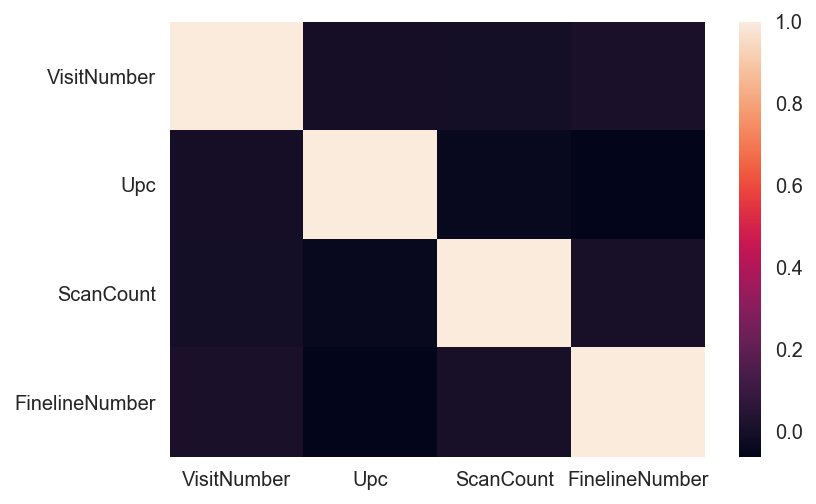

In [18]:
sns.heatmap(corr)

--> 상관계수가 큰 독립변수는 없음

In [3]:
train.dtypes

TripType                   int64
VisitNumber                int64
Weekday                   object
Upc                      float64
ScanCount                  int64
DepartmentDescription     object
FinelineNumber           float64
dtype: object

In [4]:
print(train['TripType'].count())
train['TripType'].value_counts()

647054


40     174164
39      95504
37      38954
38      29565
25      27609
7       23199
8       22844
36      21990
44      20424
42      19468
24      18015
999     17590
9       16820
32      13843
5       13836
35      12501
33       9918
15       7147
3        6827
43       6383
41       5508
30       4861
34       4751
27       4613
21       4032
22       3592
6        3405
20       3116
18       2977
28       2664
26       2507
12       2108
29       2105
31       1765
19       1188
4         901
23        325
14         35
Name: TripType, dtype: int64

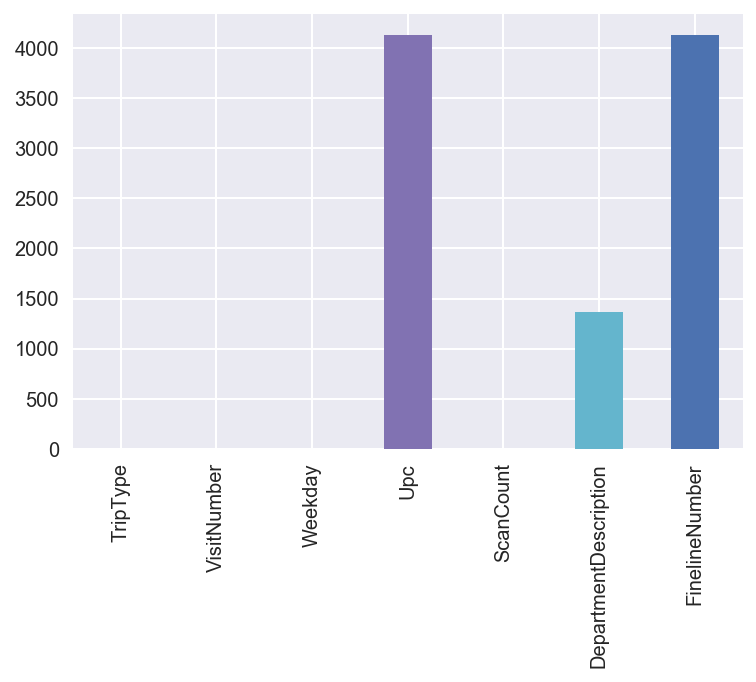

In [5]:
train.isnull().sum().plot(kind='bar')

--> NaN 값은 Upc, DepartmentDescription, FinelineNumber 에만 있음

In [6]:
# Number of unique values per column 
train.T.apply(lambda x: x.nunique(), axis=1)

TripType                    38
VisitNumber              95674
Weekday                      7
Upc                      97714
ScanCount                   39
DepartmentDescription       68
FinelineNumber            5195
dtype: int64

--> 방문유형이 38가지, 제품이 97714개

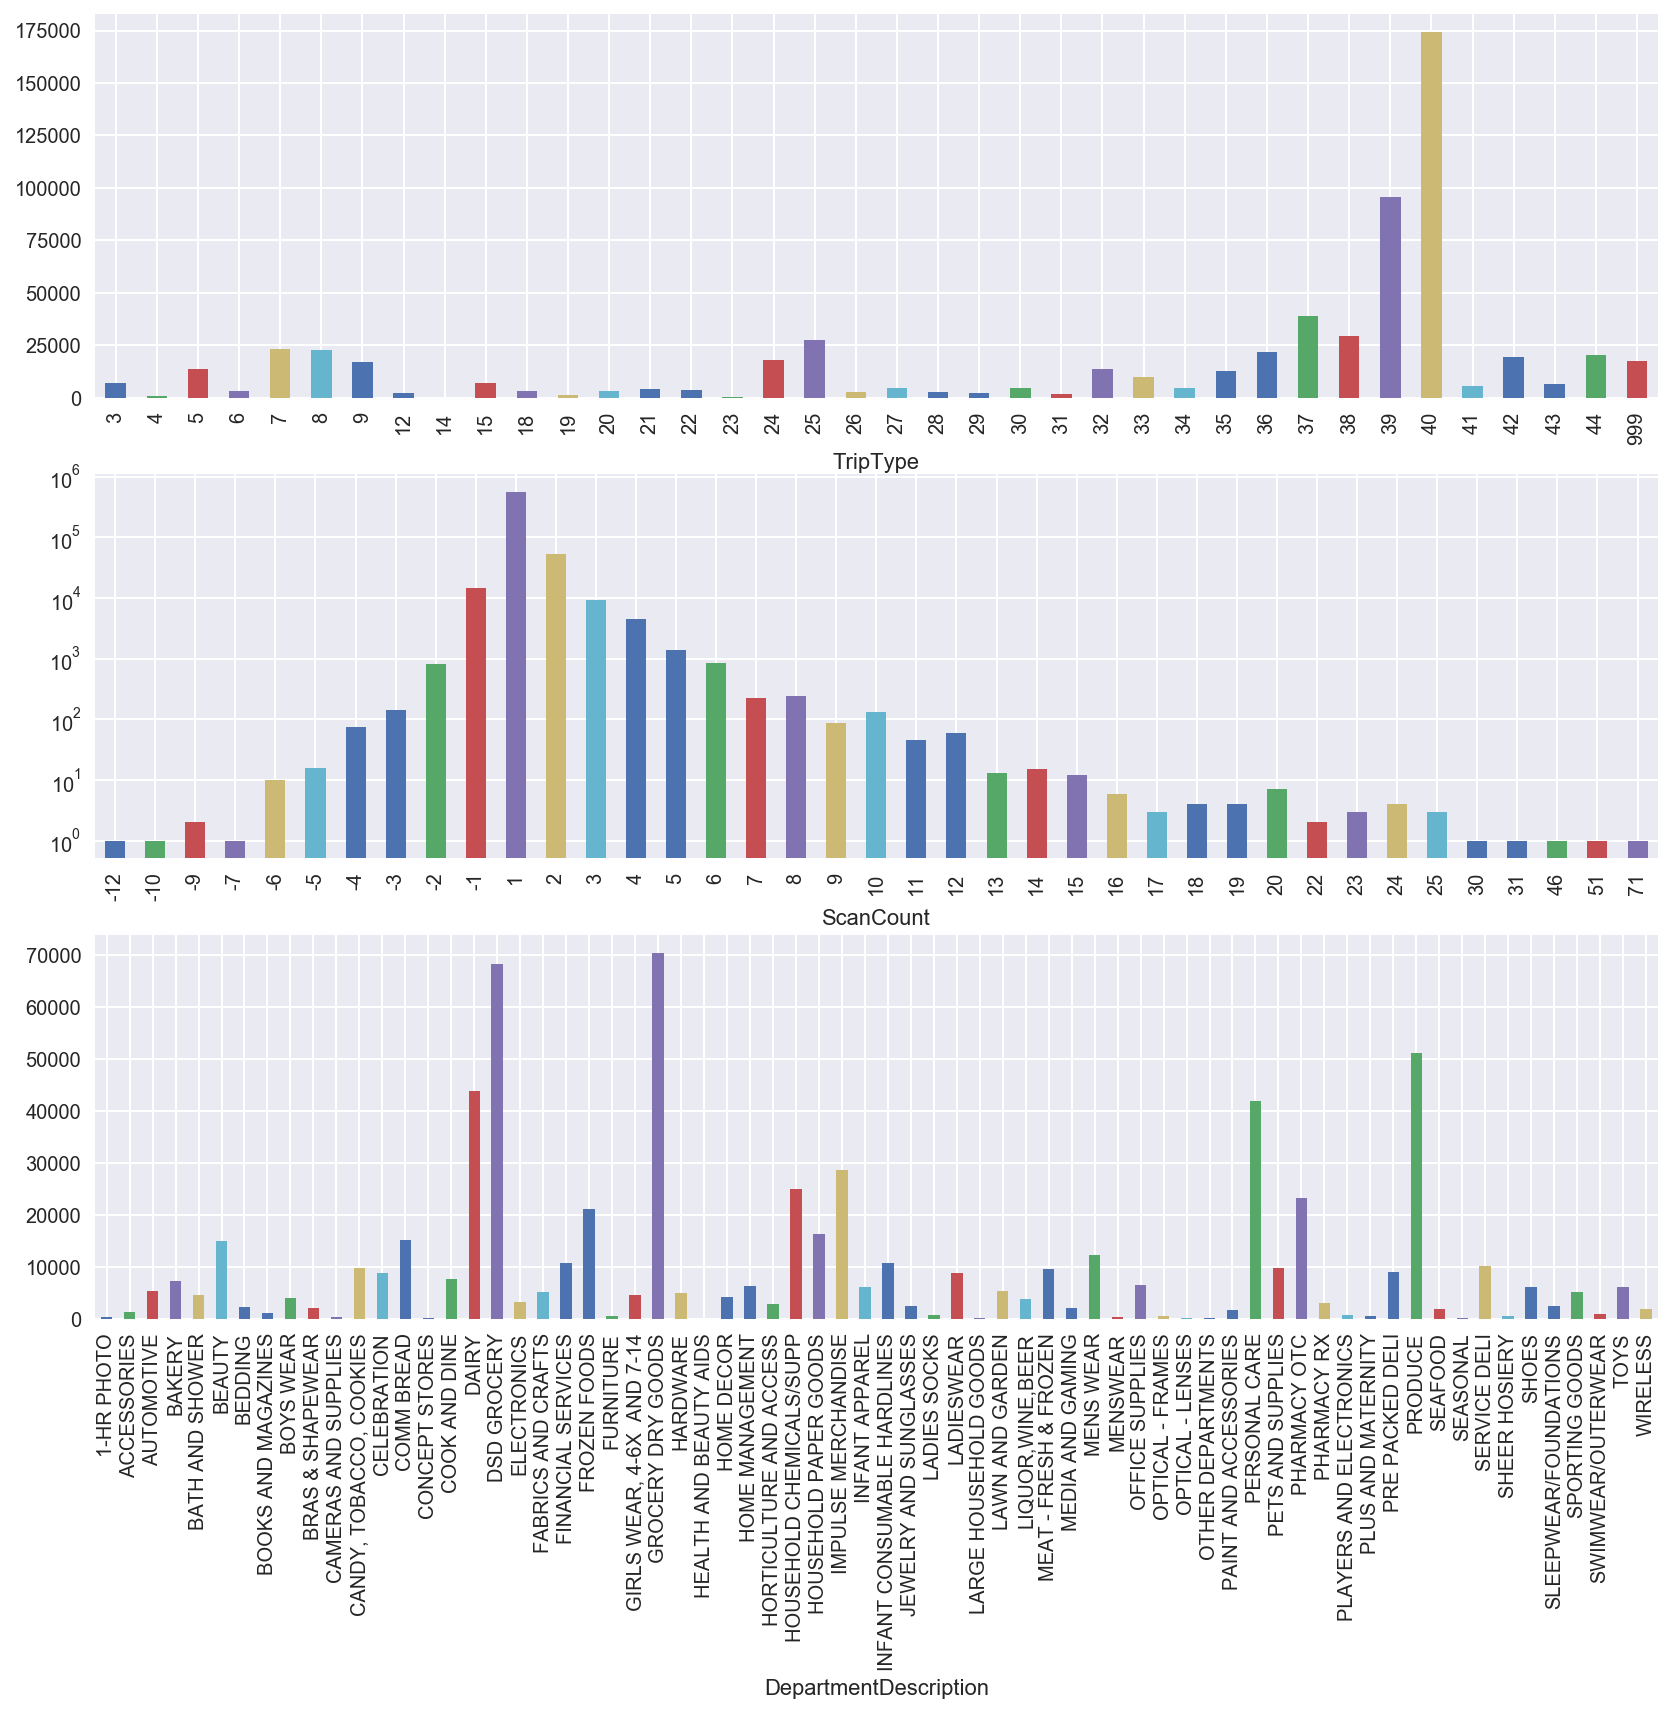

In [7]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(14, 12))

# Plot total number of TripTypes
ax1 = fig.add_subplot(311)
train.groupby(['TripType'], as_index=False).size().plot('bar')

# Plot total number of ScanCounts
ax2 = fig.add_subplot(312)
train.groupby(['ScanCount'], as_index=False).size().plot('bar', logy=True)

# Plot total number of DepartmentDescriptions
ax3 = fig.add_subplot(313)
train.groupby(['DepartmentDescription'], as_index=False).size().plot('bar')

plt.show()

<function matplotlib.pyplot.show>

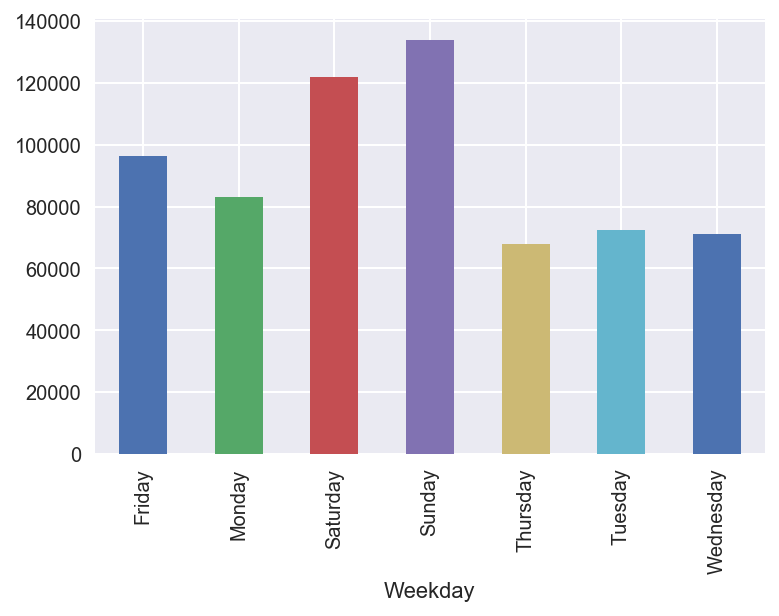

In [8]:
# Plot total number of Weekday
train.groupby(['Weekday']).size().plot('bar')
plt.show

In [ ]:
'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/usr/local/

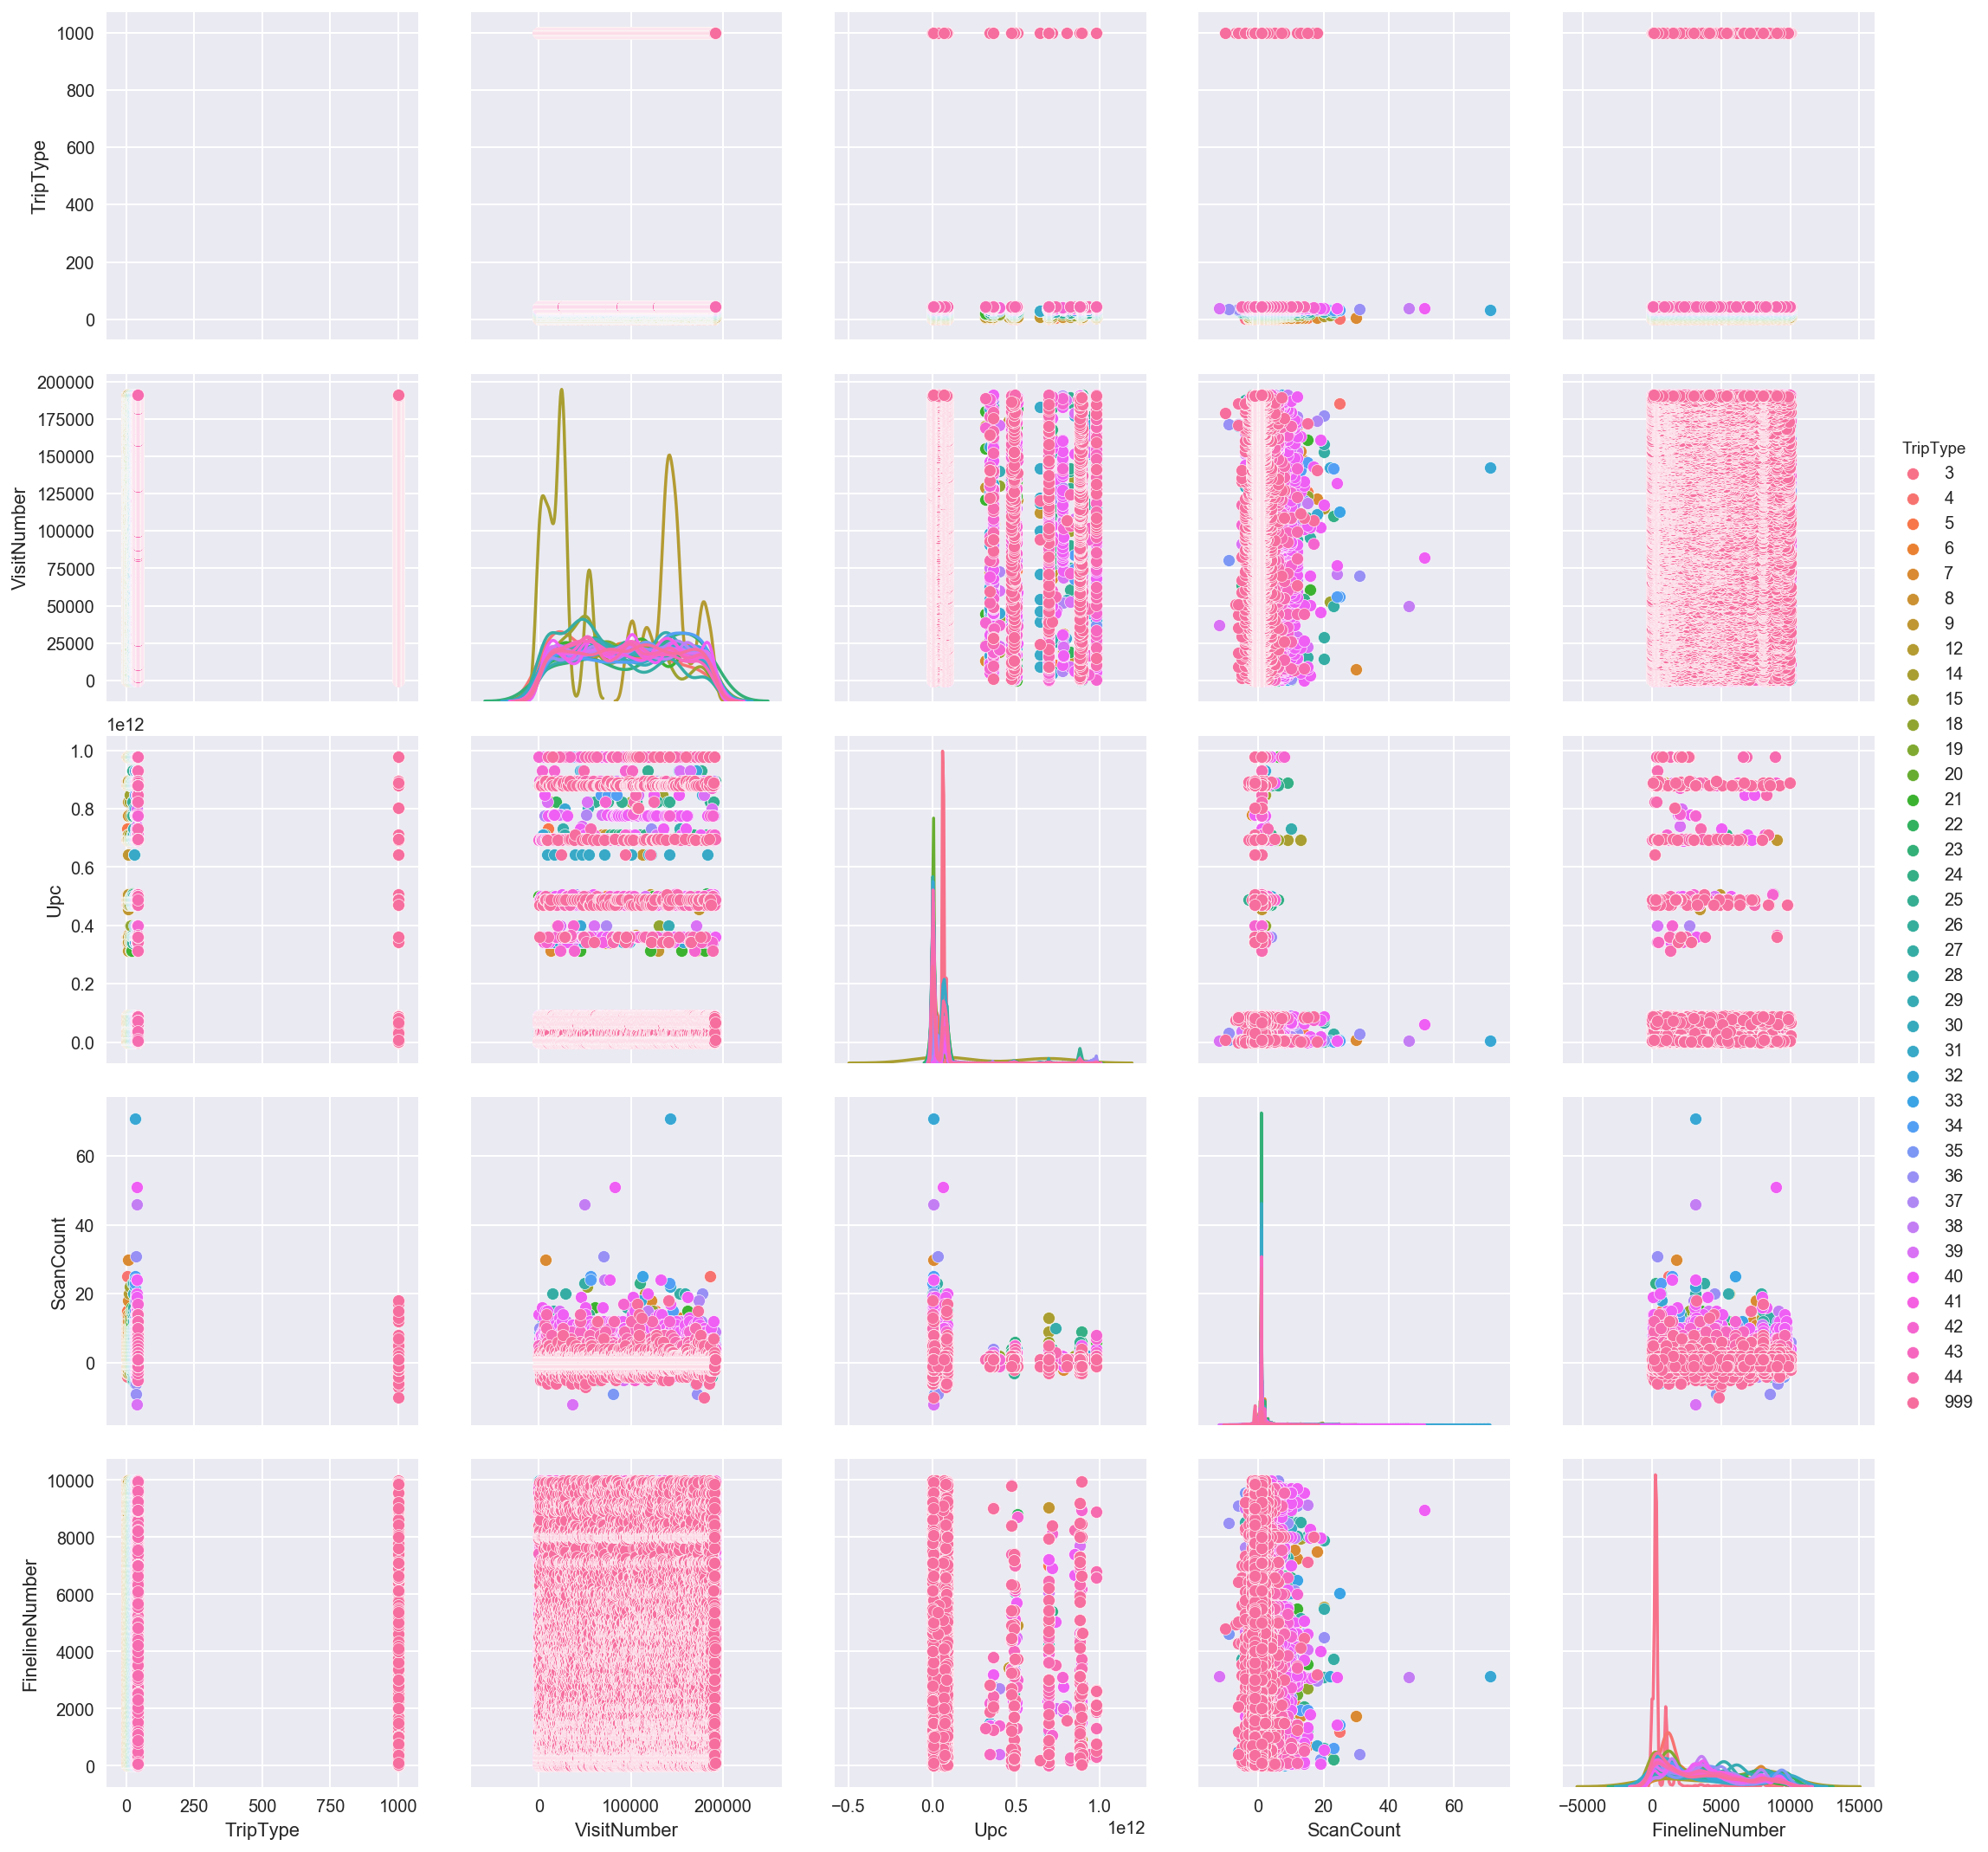

In [9]:
sns.pairplot(train, hue="TripType", size=3, diag_kind="kde")

In [20]:
train[train['DepartmentDescription'].isin(['COMM BREAD'])]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
84,25,28,Friday,2.430004e+09,1,COMM BREAD,3709.0
107,8,45,Friday,7.343509e+09,1,COMM BREAD,3791.0
120,8,54,Friday,2.430078e+09,1,COMM BREAD,2286.0
151,8,74,Friday,2.430078e+09,2,COMM BREAD,2286.0
178,37,86,Friday,7.225001e+09,1,COMM BREAD,3761.0
203,8,91,Friday,2.430078e+09,1,COMM BREAD,2286.0
212,38,97,Friday,7.225004e+09,2,COMM BREAD,3702.0
218,38,97,Friday,4.812128e+09,1,COMM BREAD,3719.0
416,35,211,Friday,7.874205e+09,1,COMM BREAD,3732.0
571,40,274,Friday,5.040075e+09,1,COMM BREAD,3725.0
